<p align="center" style="background-color: white;">
  <img src="https://www.groupe-gema.com/wp-content/uploads/2023/06/logo__gema.svg" alt="GEMA" style="width: 600px; height: auto;">
</p>

<div style="background-color: #3F579F; color: white; padding: 10px;" id="1">
<h1> <center> B2 - Introduction au traitement de l'image </center> </h1>
</div>

<h5><center> Mars 2025 </center></h5>
<h5><center> C. Sureda G. </center></h5>

---

**<h3>Exercices chapitre 2: Traitements de base</h3>**

---

In [1]:
#Import de librairies nécessaires pour ce chapitre

from PIL import Image        # Permet de charger, traiter et sauvegarder plusieurs formats d'images différents.
from PIL import ImageOps     # Fournit des opérations de traitement d'image telles que le recadrage, le retournement, ou la rotation.
from PIL import ImageEnhance # Offre des fonctions pour ajuster les propriétés des images, telles que la couleur, le contraste, la luminosité et la netteté.

# NumPy est une bibliothèque pour le calcul scientifique en Python.
import numpy as np           # Elle est largement utilisée pour la manipulation de grands tableaux et matrices multidimensionnelles, comme une image.

# Tkinter est la bibliothèque standard de Python pour la création d'interfaces graphiques utilisateur (GUI).
import tkinter as tk         # Elle va être utilisée pour avoir des informations sur l'écran de notre ordinateur.

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
1. Ne garder qu'une seule composante de couleur
</div>

A partir d'une image, on peut en créer 3 différentes dans laquelle on ne garde que la composante rouge, verte ou bleue de chaque pixel. L'image originale étant alors la superposition des trois.

On souhaite sélectionner une seule des composantes.

In [2]:
# On charge l'image et on la transforme en tableau contenant les couleurs
image_entrée = Image.open("lolipop.jpg")
image = np.asarray(image_entrée)
nb_lignes, nb_colonnes, _ = image.shape

image_sortie = np.copy(image)
for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        # On garde seulement la composante rouge en mettant à zéro les valeurs vertes (1) et bleues (2)
        image_sortie[ligne, col, 1] = 0  # Zéro pour le vert
        image_sortie[ligne, col, 2] = 0  # Zéro pour le bleu

# On sauvegarde les images pour pouvoir les afficher
image_sortie = Image.fromarray(image_sortie.astype(np.uint8))
image_sortie.show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
2. Remplacer un fond vert par une autre image
</div>

Intéressons nous maintenant à une tranformation devenue classique : remplacer un fond vert par ce que l'on veut. Nous allons utiliser une image avec fond vert (fichier pouce.jpg) et nous allons remplacer le vert par l'image de poivrons (fichier peppers.jpg).

Astuce: il faudra définir un seuil de tolérance autour de la valeur verte pure.

In [3]:
# On charge les images et on les transforme en tableau contenant les couleurs
image_peppers = np.asarray(Image.open("peppers.jpg"))
image_fond_vert = np.asarray(Image.open("pouce.jpg"))
nb_lignes, nb_colonnes, _ = image_fond_vert.shape

# Définir une plage de tolérance pour la couleur verte
seuil_vert = 80  # La tolérance autour de la valeur verte pure

image_sortie = np.copy(image_fond_vert)
for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        # On vérifie si le pixel est vert (avec une certaine tolérance)
        if (image_sortie[ligne, col, 1] > 255 - seuil_vert and
            image_sortie[ligne, col, 0] < seuil_vert and
            image_sortie[ligne, col, 2] < seuil_vert):
            # Remplacer le pixel vert par le pixel correspondant de l'image peppers
            image_sortie[ligne, col] = image_peppers[ligne, col]

# On sauvegarde l'image pour pouvoir l'afficher
Image.fromarray(image_sortie.astype(np.uint8)).show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
3. Remplacer une couleur par une autre
</div>

Nous souhaitons remplacer la couleur bleu du pouce par la couleur rouge.

Astuce: la couleur centrale du pouce est (59, 110, 189)

In [4]:
# On charge l'image et on la transforme en tableau contenant les couleurs
image_entrée = Image.open("pouce.jpg")
image = np.asarray(image_entrée)
nb_lignes, nb_colonnes, _ = image.shape

# Couleur cible à remplacer (bleue) et nouvelle couleur (rouge)
couleur_cible = (59, 110, 189)
nouvelle_couleur = (255, 0, 0)

# Partie à compléter pour changer le bleu spécifique en rouge
image_sortie = np.copy(image)
for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        # Vérifier si le pixel correspond à la couleur cible
        if (image_sortie[ligne, col] == couleur_cible).all():
            image_sortie[ligne, col] = nouvelle_couleur

# On sauvegarde les images pour pouvoir les afficher
Image.fromarray(image_sortie.astype(np.uint8)).show()

In [5]:
# On charge l'image et on la transforme en tableau contenant les couleurs
image_entrée = Image.open("pouce.jpg")
image = np.asarray(image_entrée)
nb_lignes, nb_colonnes, _ = image.shape

# Couleur cible à remplacer (bleue) et nouvelle couleur (rouge)
couleur_cible = (59, 110, 189)
nouvelle_couleur = (255, 0, 0)

# Partie à compléter pour changer le bleu spécifique en rouge
image_sortie = np.copy(image)
for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        # Vérifier si le pixel correspond à la couleur cible
        if (image_sortie[ligne, col, 0] == 59 and
            image_sortie[ligne, col, 1] == 110 and
            image_sortie[ligne, col, 2] == 189):
            image_sortie[ligne, col] = nouvelle_couleur

# On sauvegarde les images pour pouvoir les afficher
Image.fromarray(image_sortie.astype(np.uint8)).show()

Avec seuil de tolérance

In [6]:
# Fonction qui détermine si un pixel est proche d'une couleur cible en tenant compte d'une tolérance
def is_color_within_tolerance(pixel, target_color, tolerance):
    return np.all(np.abs(pixel - target_color) <= tolerance)

# Charger l'image et la transformer en tableau numpy
image_entrée = Image.open("pouce.jpg")
image = np.array(image_entrée)
nb_lignes, nb_colonnes, _ = image.shape

# Couleur cible à remplacer et nouvelle couleur
couleur_cible = np.array((37, 112, 195))
nouvelle_couleur = np.array((255, 0, 0))

# Seuil de tolérance pour la couleur
tolerance = np.array([60, 60, 60]) # Vous pouvez ajuster cette tolérance comme vous le souhaitez

# Créer une copie de l'image pour la sortie
image_sortie = np.copy(image)

# Boucler sur chaque pixel et remplacer la couleur si elle est dans la tolérance
for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        # Vérifier si le pixel correspond à la couleur cible avec la tolérance
        if is_color_within_tolerance(image_sortie[ligne, col], couleur_cible, tolerance):
            image_sortie[ligne, col] = nouvelle_couleur

# Convertir le tableau numpy en image PIL et l'afficher
Image.fromarray(image_sortie).show()

<div style="background-color: gold; padding: 10px; border-radius: 5px; color: black">
4. Déviner les traitements effectués
</div>

Avec l'aide de Numpy et sans utiliser des méthodes directes de Pillow, faire les traitements correspondants sur l'image "chat-lion" pour obtenir les images modifiées ci-dessous

![Capture d’écran 2024-04-04 à 21.13.26.png](<attachment:Capture d’écran 2024-04-04 à 21.13.26.png>)
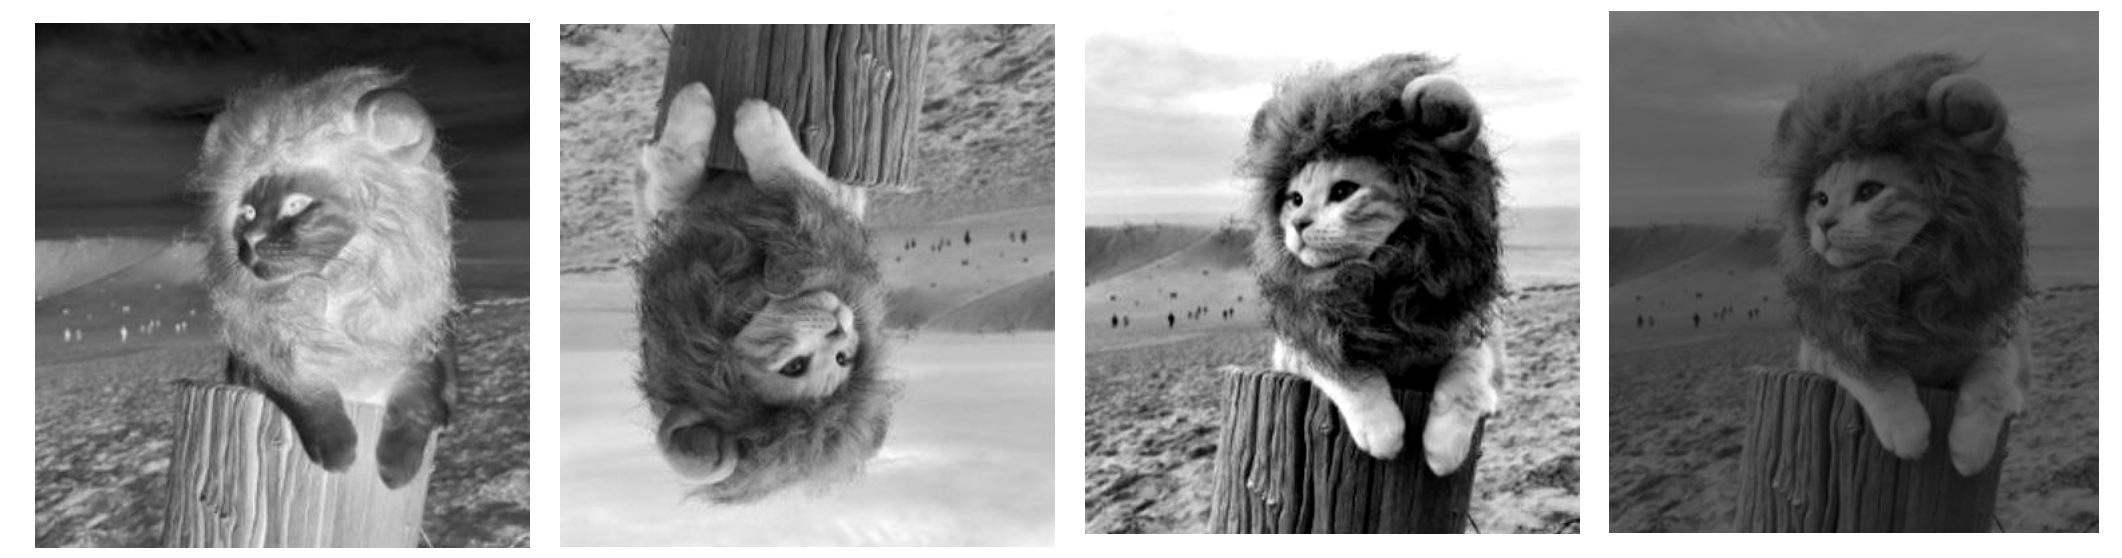

In [14]:
# Charger l'image
img_path = 'chat-lion.jpg'
img = Image.open(img_path)

<h3>Retourner 180 degrés</h3>

In [21]:
img_np = np.array(img)

# Obtenir les dimensions de l'image
hauteur, largeur = img_np.shape[:2]

# Créer un nouveau tableau NumPy pour l'image tournée
img_rotated_180 = np.zeros_like(img_np)

# Effectuer la rotation de 180 degrés avec des boucles
for y in range(hauteur):
    for x in range(largeur):
        img_rotated_180[hauteur-1-y, largeur-1-x] = img_np[y, x]

# Afficher l'image
Image.fromarray(img_rotated_180.astype(np.uint8)).show()

Avec Pillow:

In [22]:
img_rotated = img.rotate(180)
img_rotated.show()

<h3>Inversion des couleurs</h3>

In [23]:
img_np = np.array(img)

# Inverser les couleurs de l'image
img_inverted = 255 - img_np

Image.fromarray(img_inverted.astype(np.uint8)).show()

Avec Pillow:

In [18]:
# 3. Inversion des couleurs
img_inverted = ImageOps.invert(img)
img_inverted.show()

<h3>Augmentation du contraste</h3>

In [19]:
# Charger l'image en utilisant Pillow
img_path = 'chat-lion.jpg'
img = Image.open(img_path)

# Convertir l'image en un tableau NumPy
img_array = np.asarray(img, dtype=np.float64)

# Trouver les valeurs minimales et maximales dans l'image
i_min = img_array.min()
i_max = img_array.max()

# Appliquer la formule pour ajuster le contraste
# la méthode clip s'assure que toutes les valeurs du tableau sont limitées à l'intervalle [0, 255]
img_array_contrasted = (255 * (img_array - i_min) / (i_max - i_min)).clip(0, 255)

# Convertir en uint8 pour créer une image PIL à partir du tableau NumPy
img_array_contrasted = img_array_contrasted.astype(np.uint8)

# Convertir le tableau ajusté en une image
img_contrasted = Image.fromarray(img_array_contrasted)

# Afficher l'image ajustée
img_contrasted.show()

In [24]:
contrast_enhancer = ImageEnhance.Contrast(img)
img_contrasted = contrast_enhancer.enhance(1.5)
img_contrasted.show()

<h3>Diminution de la luminosité</h3>

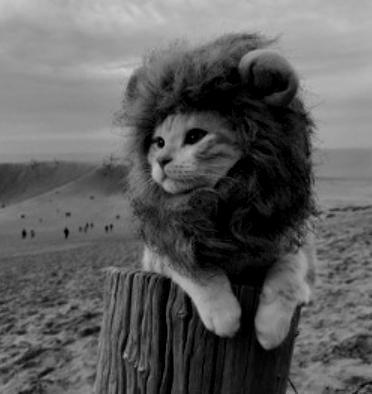

In [30]:
image = np.asarray(img)
nb_lignes, nb_colonnes = image.shape


image_sortie = np.copy(image)
ajustement_luminosite = -50
for ligne in range(nb_lignes):
    for col in range(nb_colonnes):
        nouvelle_valeur = image[ligne, col] + ajustement_luminosite
        image_sortie[ligne, col] = max(0, min(255, nouvelle_valeur))

image_sortie_obj = Image.fromarray(image_sortie.astype(np.uint8))
image_sortie_obj

Avec Pillow

In [ ]:
enhancer = ImageEnhance.Brightness(img)
img_brightened = enhancer.enhance(0.5)
img_brightened.show()